In [1]:
# EECE 5090 -- Linear Systems Analysis
# UMass Lowell

# Michael Brunetti
# 5/24/2019

In [22]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit

import os
import csv

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Configure matplotlib for latex plotting

mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')

In [4]:
device_1_files = ["Device-1/" + x for x in os.listdir("Device-1")]
device_2_files = ["Device-2/" + x for x in os.listdir("Device-2")]
device_3_files = ["Device-3/" + x for x in os.listdir("Device-3")]

In [5]:
# Read data files for each device

voltages = [0, 0.1, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10]

device_1_data = {}
device_2_data = {}
device_3_data = {}

for files, data in zip([device_1_files,
                        device_2_files,
                        device_3_files],
                       [device_1_data,
                        device_2_data,
                        device_3_data]):
    for filename in files:
        if len(filename)==18:
            key = filename[-4:]
        elif len(filename)==19:
            key = filename[-5:]
        data[key] = []

        with open(filename, 'r') as f:
            for line in f:
                data[key].append(float(line))

(0, 40000)

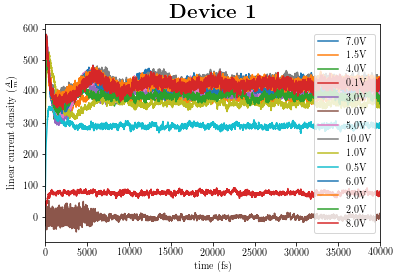

In [6]:
# Plot Device 1 curves on single graph

for k, v in device_1_data.items():
    plt.plot(v[1:], label=k)

plt.title(r'\huge{\textbf{Device 1}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')

plt.legend(loc="center right")
# plt.ylim(0, 600)
plt.xlim(0, 40000)

In [117]:
# Calculate standard deviation of noise for Device 1

print("dev 1 standard deviation - %f" % np.std(device_1_data["0.0V"][150000:]))

dev 1 standard deviation - 4.724421


(0, 150000)

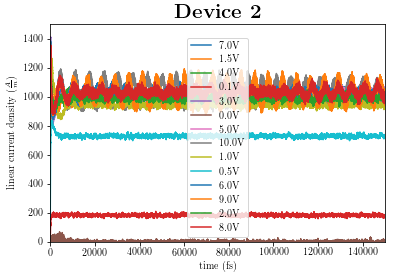

In [7]:
# Plot Device 2 curves on single graph

for k, v in device_2_data.items():
    plt.plot(v[1:], label=k)

plt.title(r'\huge{\textbf{Device 2}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')

plt.legend()
plt.ylim(0, 1500)
plt.xlim(0, 150000)

In [118]:
# Calculate standard deviation of noise for Device 2

print("dev 2 standard deviation - %f" % np.std(device_2_data["0.0V"][150000:]))

dev 2 standard deviation - 6.954501


(0, 20000)

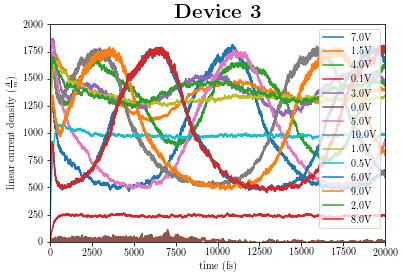

In [8]:
# Plot Device 3 curves on single graph

for k, v in device_3_data.items():
    plt.plot(v[1:], label=k)

plt.title(r'\huge{\textbf{Device 3}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')

plt.legend()
plt.ylim(0, 2000)
plt.xlim(0, 20000)

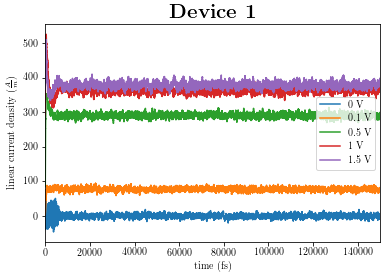

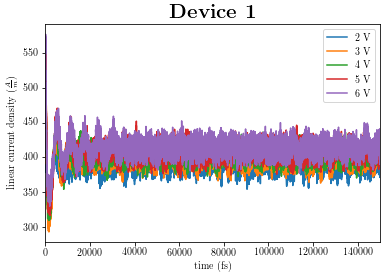

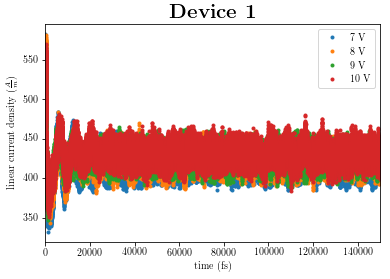

In [9]:
# Create device 1 plots

plt.plot(device_1_data["0.0V"][1:], label="0 V")
plt.plot(device_1_data["0.1V"][1:], label="0.1 V")
plt.plot(device_1_data["0.5V"][1:], label="0.5 V")
plt.plot(device_1_data["1.0V"][1:], label="1 V")
plt.plot(device_1_data["1.5V"][1:], label="1.5 V")

plt.title(r'\huge{\textbf{Device 1}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.legend()
plt.savefig('Figures/Device_1/0_to_1_5.png')

plt.figure()

plt.plot(device_1_data["2.0V"][1:], label="2 V")
plt.plot(device_1_data["3.0V"][1:], label="3 V")
plt.plot(device_1_data["4.0V"][1:], label="4 V")
plt.plot(device_1_data["5.0V"][1:], label="5 V")
plt.plot(device_1_data["6.0V"][1:], label="6 V")

plt.title(r'\huge{\textbf{Device 1}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.legend(loc="upper right")
plt.savefig('Figures/Device_1/2_to_6V.png')

plt.figure()

plt.plot(device_1_data["7.0V"][1:], '.', label="7 V")
plt.plot(device_1_data["8.0V"][1:], '.', label="8 V")
plt.plot(device_1_data["9.0V"][1:], '.', label="9 V")
plt.plot(device_1_data["10.0V"][1:], '.', label="10 V")

plt.title(r'\huge{\textbf{Device 1}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.legend()
plt.savefig('Figures/Device_1/7_to_10V.png')

In [10]:
# Fit function for device 1, DC offset with decaying exponential

def dev_1_fit_function(t, dc_gain, osc_amp, time_const, frequency, phase):
    return dc_gain + osc_amp * np.exp( -t/time_const ) * np.cos(2*np.pi*frequency*t + phase)

In [17]:
# Apply lowpass filter to device 1 data, least sqaures fit to model function

b, a = signal.butter(2, 0.0005)

device_1_data_filtered = {}
device_1_fit = {}
device_1_fit_cov = {}

for k, v in device_1_data.items():
    time_data = np.linspace(0, len(v[1:]), len(v[1:]))
    
    device_1_data_filtered[k] = signal.filtfilt(b, a, v[1:], method='pad', padtype='even')

    device_1_fit[k], device_1_fit_cov[k] = curve_fit(dev_1_fit_function, time_data, device_1_data_filtered[k], p0=[1, 1, 10000, (1/10000), 1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


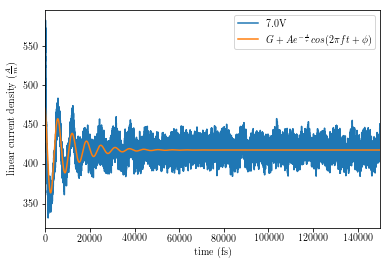

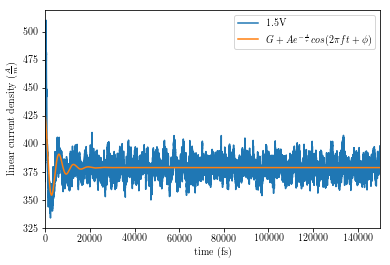

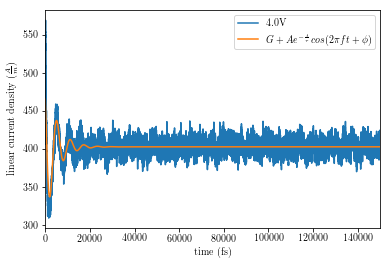

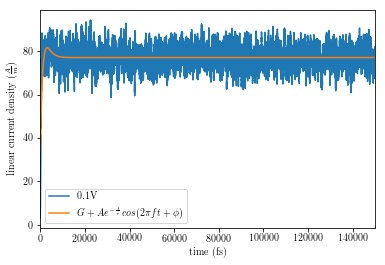

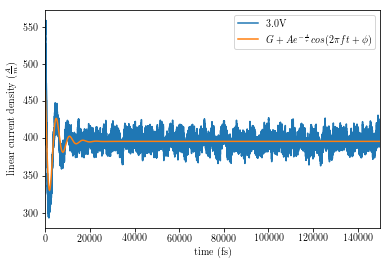

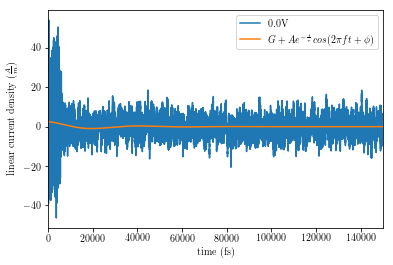

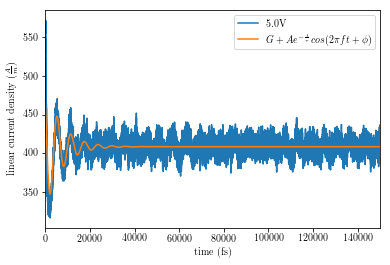

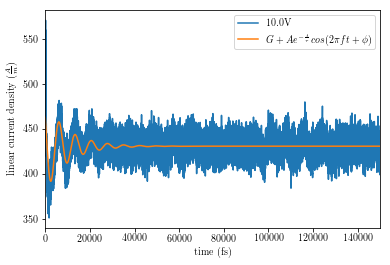

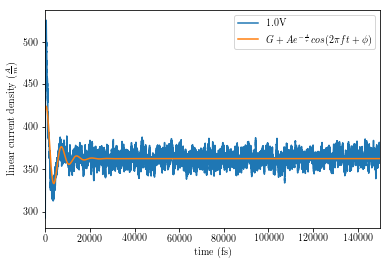

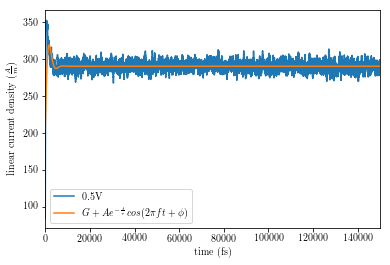

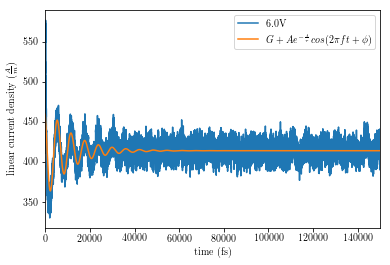

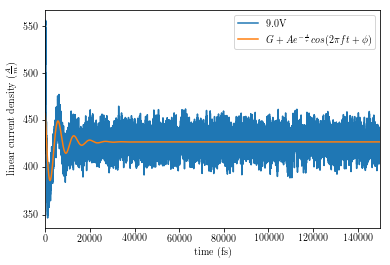

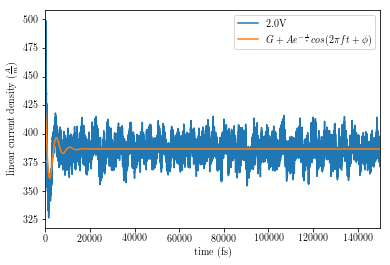

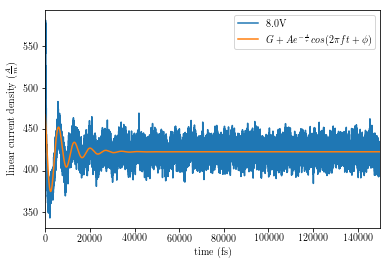

In [49]:
# Plot simulation data and fit function

f = open('Figures/Device_1/Curve_fits/device_1_curve_fit.csv', 'w')
writer = csv.writer(f)

writer.writerow(["Potential", "DC Gain", "Oscillation Amplitude", "Exponential Time Constant", "Frequency", "Phase"])

for k in device_1_data.keys():
    plt.figure()
    plt.plot(device_1_data[k][1:], label=k)
    fit_label = "$ G + A e^{ - \\frac{t}{ \\tau } } cos ( 2 \\pi f t + \\phi ) $"
    plt.plot(time_data, dev_1_fit_function(time_data, *device_1_fit[k]), label=fit_label)
    plt.legend()
    plt.xlabel(r'time (fs)')
    plt.ylabel(r'linear current density ($\frac{A}{m}$)')
    plt.xlim(0, 150000)
    plt.savefig("Figures/Device_1/Curve_fits/" + k + ".png")

    row = [k] + [str(i) for i in device_1_fit[k]]
    
    writer.writerow(row)

f.close()

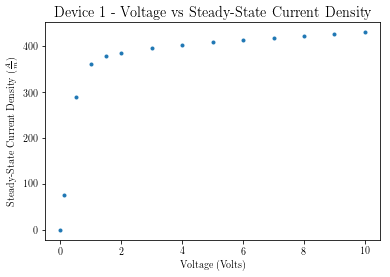

In [113]:
# Plot DC gain vs voltage

voltages = []
gains = []

with open('Figures/Device_1/Curve_fits/device_1_curve_fit.csv', 'r') as f:
    reader = csv.reader(f)

    for i, row in enumerate(reader):
        if i==0:
            continue

        voltage = row[0]
        
        voltages.append(float(voltage[0:len(voltage) - 1]))
        gains.append(float(row[1]))
        
plt.plot(voltages, gains, '.')
plt.title('\\Large{Device 1 - Voltage vs Steady-State Current Density}')        
plt.xlabel('Voltage (Volts)')
plt.ylabel('Steady-State Current Density ($\\frac{A}{m}$)')
plt.savefig('Figures/Device_1/SteadyState.png')

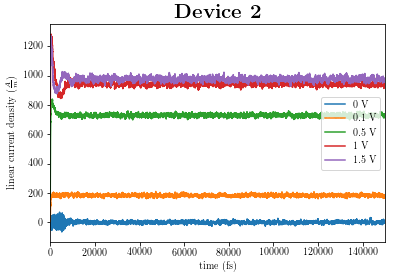

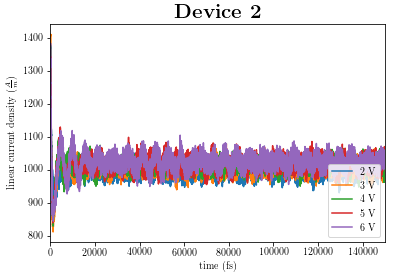

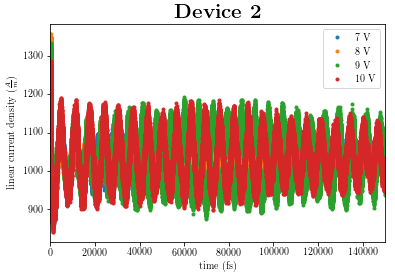

In [27]:
# Create device 2 plots

plt.plot(device_2_data["0.0V"][1:], label="0 V")
plt.plot(device_2_data["0.1V"][1:], label="0.1 V")
plt.plot(device_2_data["0.5V"][1:], label="0.5 V")
plt.plot(device_2_data["1.0V"][1:], label="1 V")
plt.plot(device_2_data["1.5V"][1:], label="1.5 V")

plt.title(r'\huge{\textbf{Device 2}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.legend(loc="center right")
plt.savefig('Figures/Device_2/0_to_1_5.png')

plt.figure()

plt.plot(device_2_data["2.0V"][1:], label="2 V")
plt.plot(device_2_data["3.0V"][1:], label="3 V")
plt.plot(device_2_data["4.0V"][1:], label="4 V")
plt.plot(device_2_data["5.0V"][1:], label="5 V")
plt.plot(device_2_data["6.0V"][1:], label="6 V")

plt.title(r'\huge{\textbf{Device 2}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.legend(loc="lower right")
plt.savefig('Figures/Device_2/2_to_6V.png')

plt.figure()

plt.plot(device_2_data["7.0V"][1:], '.', label="7 V")
plt.plot(device_2_data["8.0V"][1:], '.', label="8 V")
plt.plot(device_2_data["9.0V"][1:], '.', label="9 V")
plt.plot(device_2_data["10.0V"][1:], '.', label="10 V")

plt.title(r'\huge{\textbf{Device 2}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.legend()
plt.savefig('Figures/Device_2/7_to_10V.png')

In [51]:
# Apply lowpass filter to device 2 data, least sqaures fit to model function

b, a = signal.butter(2, 0.0005)

device_2_data_filtered = {}
device_2_fit = {}
device_2_fit_cov = {}

for k, v in device_2_data.items():
    time_data = np.linspace(0, len(v[1:]), len(v[1:]))
    
    device_2_data_filtered[k] = signal.filtfilt(b, a, v[1:], method='pad', padtype='even')

    device_2_fit[k], device_2_fit_cov[k] = curve_fit(dev_1_fit_function, time_data, device_2_data_filtered[k], p0=[1, 50, 100000, (1/5000), 1])

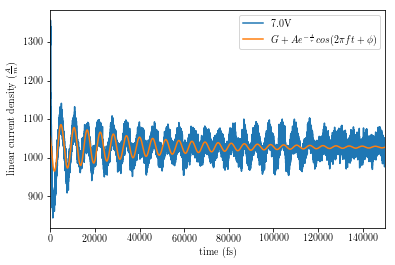

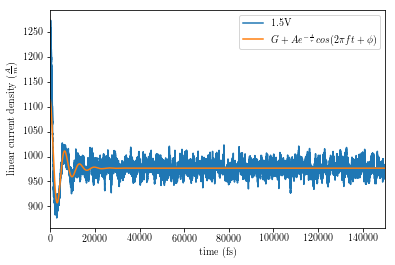

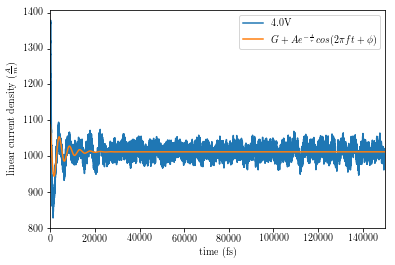

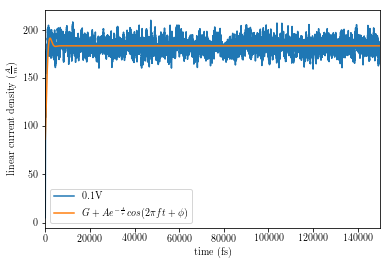

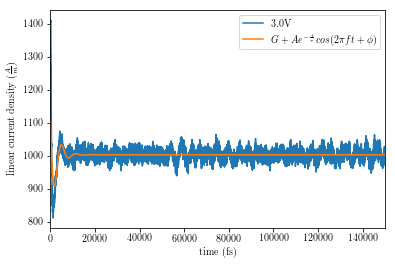

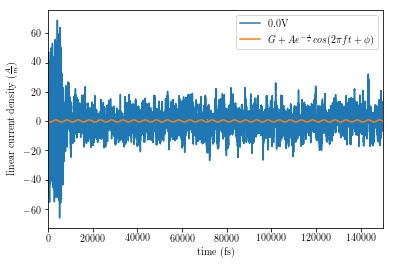

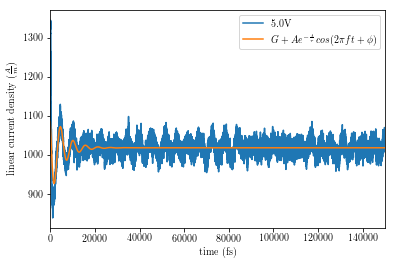

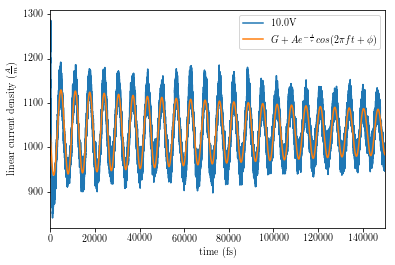

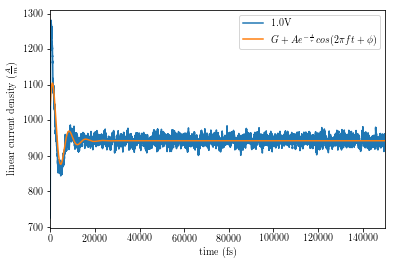

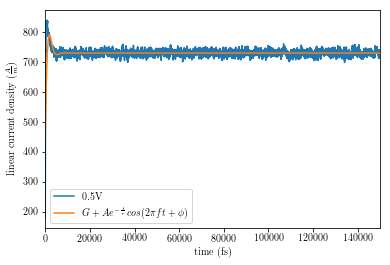

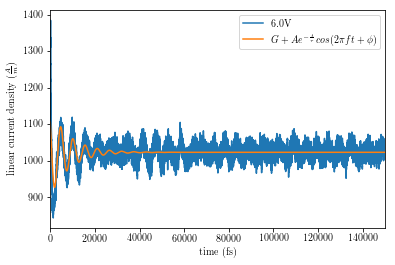

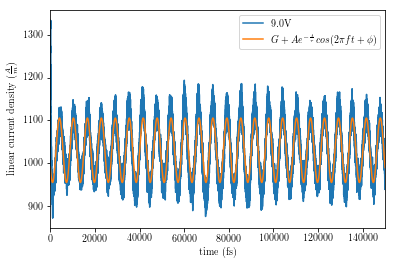

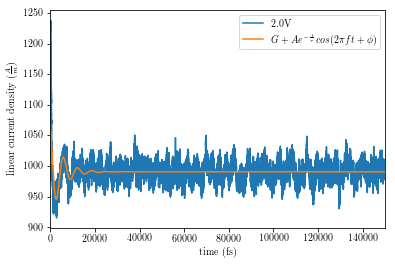

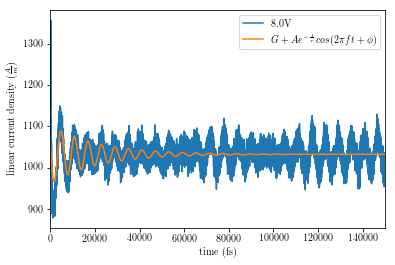

In [52]:
# Plot simulation data and fit function

f = open('Figures/Device_2/Curve_fits/device_2_curve_fit.csv', 'w')
writer = csv.writer(f)

writer.writerow(["Potential", "DC Gain", "Oscillation Amplitude", "Exponential Time Constant", "Frequency", "Phase"])

for k in device_2_data.keys():
    plt.figure()
    plt.plot(device_2_data[k][1:], label=k)
    fit_label = "$ G + A e^{ - \\frac{t}{ \\tau } } cos ( 2 \\pi f t + \\phi ) $"
    plt.plot(time_data, dev_1_fit_function(time_data, *device_2_fit[k]), label=fit_label)
    plt.legend()
    plt.xlim(0, 150000)
    plt.xlabel(r'time (fs)')
    plt.ylabel(r'linear current density ($\frac{A}{m}$)')
    plt.savefig("Figures/Device_2/Curve_fits/" + k + ".png")

    row = [k] + [str(i) for i in device_2_fit[k]]
    
    writer.writerow(row)

f.close()

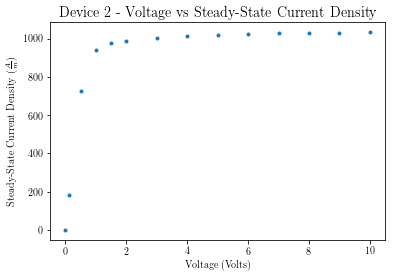

In [115]:
# Plot DC gain vs voltage

voltages = []
gains = []

with open('Figures/Device_2/Curve_fits/device_2_curve_fit.csv', 'r') as f:
    reader = csv.reader(f)

    for i, row in enumerate(reader):
        if i==0:
            continue

        voltage = row[0]
        
        voltages.append(float(voltage[0:len(voltage) - 1]))
        gains.append(float(row[1]))
        
plt.plot(voltages, gains, '.')
plt.title('\\Large{Device 2 - Voltage vs Steady-State Current Density}')        
plt.xlabel('Voltage (Volts)')
plt.ylabel('Steady-State Current Density ($\\frac{A}{m}$)')
plt.savefig('Figures/Device_2/SteadyState.png')

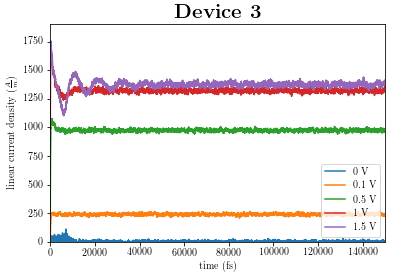

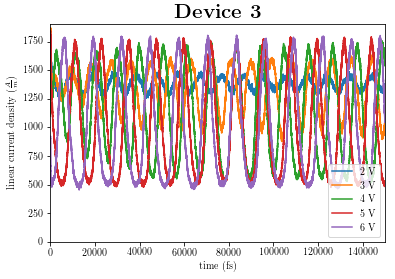

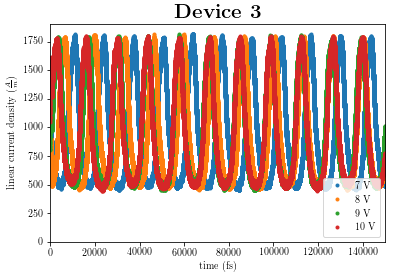

In [113]:
# Create device 3 plots

plt.plot(device_3_data["0.0V"][1:], label="0 V")
plt.plot(device_3_data["0.1V"][1:], label="0.1 V")
plt.plot(device_3_data["0.5V"][1:], label="0.5 V")
plt.plot(device_3_data["1.0V"][1:], label="1 V")
plt.plot(device_3_data["1.5V"][1:], label="1.5 V")

plt.title(r'\huge{\textbf{Device 3}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.ylim(0, 1900)
plt.legend(loc="lower right")
plt.savefig('Figures/Device_3/0_to_1_5.png')

plt.figure()

plt.plot(device_3_data["2.0V"][1:], label="2 V")
plt.plot(device_3_data["3.0V"][1:], label="3 V")
plt.plot(device_3_data["4.0V"][1:], label="4 V")
plt.plot(device_3_data["5.0V"][1:], label="5 V")
plt.plot(device_3_data["6.0V"][1:], label="6 V")

plt.title(r'\huge{\textbf{Device 3}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.ylim(0, 1900)
plt.legend(loc="lower right")
plt.savefig('Figures/Device_3/2_to_6V.png')

plt.figure()

plt.plot(device_3_data["7.0V"][1:], '.', label="7 V")
plt.plot(device_3_data["8.0V"][1:], '.', label="8 V")
plt.plot(device_3_data["9.0V"][1:], '.', label="9 V")
plt.plot(device_3_data["10.0V"][1:], '.', label="10 V")

plt.title(r'\huge{\textbf{Device 3}}')
plt.xlabel(r'time (fs)')
plt.ylabel(r'linear current density ($\frac{A}{m}$)')
plt.xlim(0, 150000)
plt.ylim(0, 1900)
plt.legend(loc="lower right")
plt.savefig('Figures/Device_3/7_to_10V.png')

In [94]:
# Apply lowpass filter to device 3 data, least sqaures fit to model function

b, a = signal.butter(2, 0.0005)

device_3_data_filtered = {}
device_3_fit = {}
device_3_fit_cov = {}

for k, v in device_3_data.items():
    time_data = np.linspace(0, len(v[1:]), len(v[1:]))
    
    device_3_data_filtered[k] = signal.filtfilt(b, a, v[1:], method='pad', padtype='even')

    amp = 50
    
    if k=="8.0V" or k=="1.5V":
        frequency = 1 / 155000
    elif k=="9.0V":
        frequency = 1 / 10000
    elif k=="4.0V":
        frequency = 1 / 10000
        amp = 1000
    elif k=="6.0V":
        amp = 1500
        frequency = 1 / 11000
    elif k=="3.0V":
        amp = 1200
        frequency = 1 / 8000
    else:
        frequency = 1 / 15000

    try:
        device_3_fit[k], device_3_fit_cov[k] = curve_fit(dev_1_fit_function, time_data, device_3_data_filtered[k], p0=[1, amp, 100000, frequency, 1])
    except RuntimeError:
        print("fit error - %s" % k)
        device_3_fit[k] = [1, 1, 1, 1, 1]

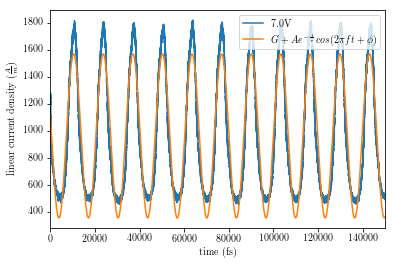

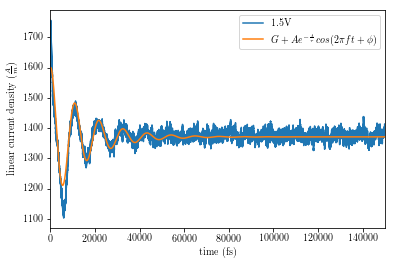

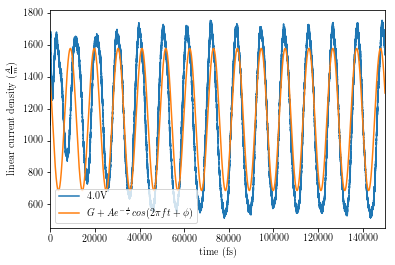

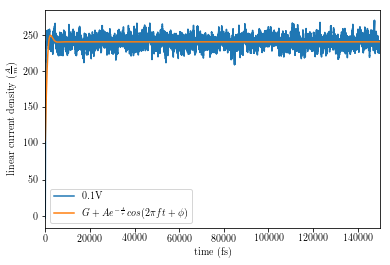

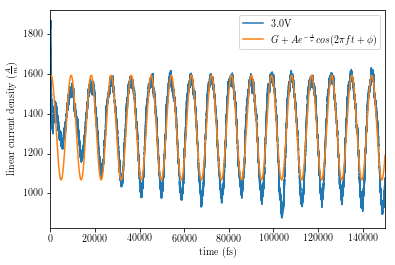

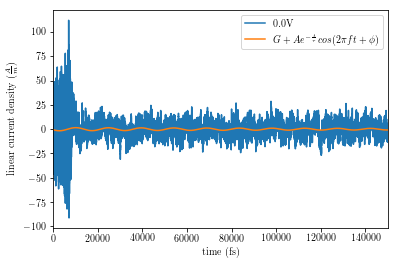

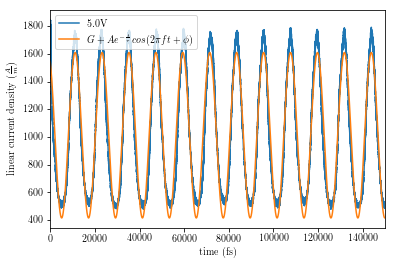

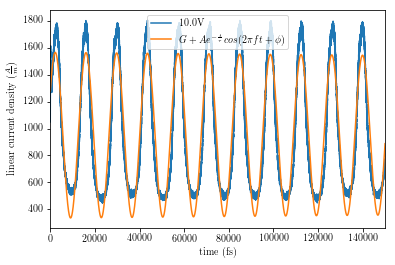

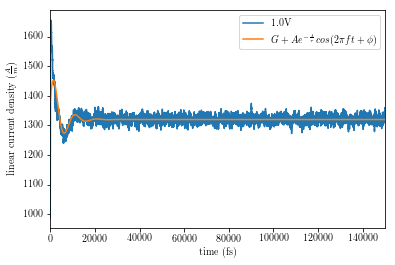

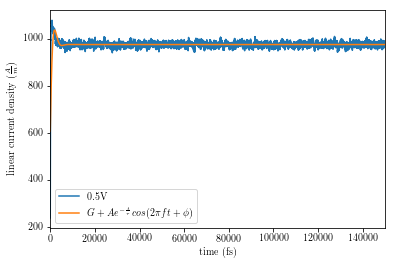

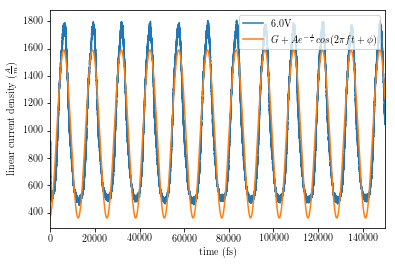

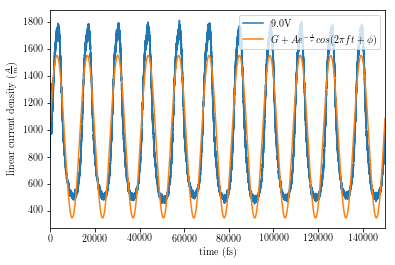

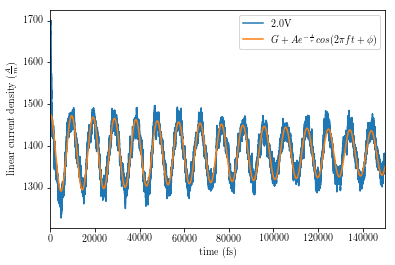

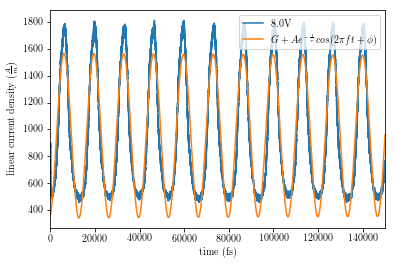

In [95]:
# Plot simulation data and fit function

f = open('Figures/Device_3/Curve_fits/device_3_curve_fit.csv', 'w')
writer = csv.writer(f)

writer.writerow(["Potential", "DC Gain", "Oscillation Amplitude", "Exponential Time Constant", "Frequency", "Phase"])

for k in device_3_data.keys():
    plt.figure()
    plt.plot(device_3_data[k][1:], label=k)
    fit_label = "$ G + A e^{ - \\frac{t}{ \\tau } } cos ( 2 \\pi f t + \\phi ) $"
    plt.plot(time_data, dev_1_fit_function(time_data, *device_3_fit[k]), label=fit_label)
    plt.legend()
    plt.xlim(0, 150000)
    plt.xlabel(r'time (fs)')
    plt.ylabel(r'linear current density ($\frac{A}{m}$)')
    plt.savefig("Figures/Device_3/Curve_fits/" + k + ".png")

    row = [k] + [str(i) for i in device_3_fit[k]]
    
    writer.writerow(row)

f.close()

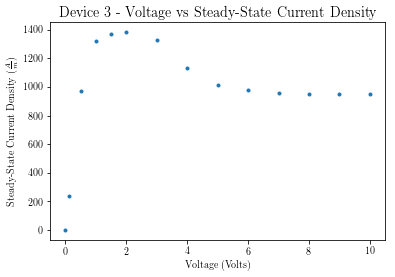

In [114]:
# Plot DC gain vs voltage

voltages = []
gains = []

with open('Figures/Device_3/Curve_fits/device_3_curve_fit.csv', 'r') as f:
    reader = csv.reader(f)

    for i, row in enumerate(reader):
        if i==0:
            continue

        voltage = row[0]
        
        voltages.append(float(voltage[0:len(voltage) - 1]))
        gains.append(float(row[1]))
        
plt.plot(voltages, gains, '.')
plt.title('\\Large{Device 3 - Voltage vs Steady-State Current Density}')        
plt.xlabel('Voltage (Volts)')
plt.ylabel('Steady-State Current Density ($\\frac{A}{m}$)')
plt.savefig('Figures/Device_3/SteadyState.png')